# Overview of `unmap`

This library aims to do 2 things:

1. Guess the colourmap from a pseudocolour image, for those occasions when the colourmap is not known and not published along with the image.
1. Reocover ('unmap') the data from a pseudocolour image, essentially performing the reverse of the pseudocolour process.

These 2 distinct tasks are illustrated below.

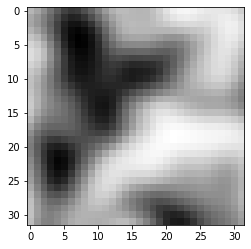

In [1]:
from gio import generate_random_surface
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Make a random surface and normalize it to the range [0, 1].
data = generate_random_surface(size=(32, 32), random_seed=42).values
data = (data - data.min()) / (data.max() - data.min())

# Take a look at it.
plt.imshow(data, cmap='Greys_r')

Note: this is a greyscale image; it's the closest thing we can make to a 'pure' visualization of the data. The values in the data array correspond to a grey level from 0 (black) to 1 (white).

If we were to look closely at the top-left corner, it's just a grid of numbers...

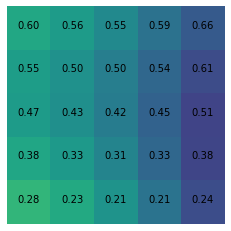

In [2]:
fig, ax = plt.subplots()
for i in range(5):
    for j in range(5):
        ax.text(i, j, f'{data[i, j]:0.2f}', ha='center')
ax.imshow(data[:5, :5], vmin=0, vmax=1)
ax.axis('off')
plt.show()

Now we'll make an RGB image out of this 2D array. This involves using a look-up table of colours, called a **colourmap**, to transform each data value into an RGB colour, which is a 3-tuple of floats like (0.25, 0.33, 0.9). In doing so, we lose the data values themselves; they are now encoded as colours.

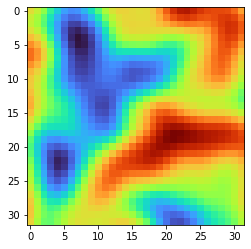

In [3]:
# Make a pseudocolored RGB image array.
imarray = cm.turbo(data)

# Display the RGB image.
plt.imshow(imarray)

If we know the colourmap and the original range of the data, then recovering data from this image is not too hard: we can do a reverse look-up of each colour in the image and replace it with the corresponding data value. This library, `unmap`, can handle this.

On the other hand, without knowledge of the colourmap, or the range of values in the original array, it is hard to recover the original dataset from this image. But in some cases, `unmap` can help with this too.

## Guess the colourmap

We know that we used the `jet` colormap to create this image, but that information is not contained in the image. It's just a 3D NumPy array.

Let's see if `unmap.guess_cmap_from_array()` can guess the colourmap we used:

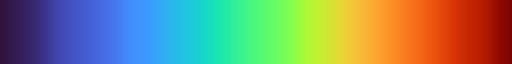

In [4]:
import unmap

cmap = unmap.guess_cmap_from_array(imarray)
cmap

Phew! It looks good. Now we can give this to the unmapping function.

## Recover the data

Use `unmap.unmap()` to try recovering the data from an image array using the colourmap we guessed:

In [5]:
rec = unmap.unmap(imarray, cmap)
rec

array([[0.65882353, 0.62352941, 0.57647059, ..., 0.85490196, 0.81960784,
        0.74117647],
       [0.63137255, 0.59607843, 0.5254902 , ..., 0.88627451, 0.86666667,
        0.80784314],
       [0.62352941, 0.59215686, 0.51372549, ..., 0.90196078, 0.89019608,
        0.83921569],
       ...,
       [0.69411765, 0.60392157, 0.54117647, ..., 0.56470588, 0.59215686,
        0.64313725],
       [0.69019608, 0.60392157, 0.55294118, ..., 0.5254902 , 0.57254902,
        0.61568627],
       [0.6745098 , 0.59607843, 0.5372549 , ..., 0.49411765, 0.55294118,
        0.59607843]])

Let's have a look at this data:

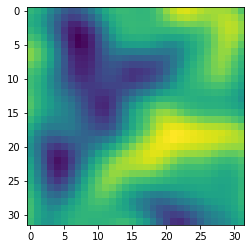

In [6]:
plt.imshow(rec)

Or we can plot it with the colourmap we recovered:

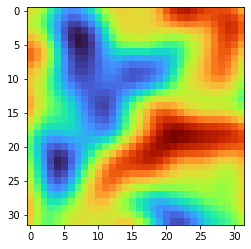

In [7]:
plt.imshow(rec, cmap=cmap)

Or, in this case, we can use the colourmap we know was applied originally to create the image:

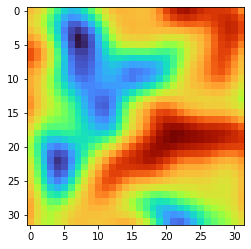

In [8]:
plt.imshow(rec, cmap='turbo')

These results look very close.

We can compute the difference:

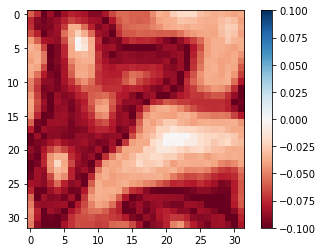

In [10]:
plt.imshow(data - rec, cmap='RdBu', vmin=-0.1, vmax=0.1)
plt.colorbar()

The absolute error seems to go up to a little above 8% in some areas. Each colourmap has its own error profile, but this order of error magnitude is typical.

## All in one

Sometimes we can actually skip the colormap guessing step and let `unmap.unmap` try to do it. Let's try it:

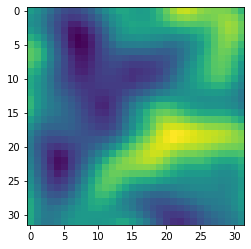

In [11]:
rec = unmap.unmap(imarray)

plt.imshow(rec)

Nice. If it works.